In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('fma-rock-vs-hiphop.csv')
echonic_metrics = pd.read_json('echonest-metrics.json')
np.random.seed(0)

In [3]:
data

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17729,155063,320000,0,NaN,2017-03-24 19:40:43,NaN,283,3,Hip-Hop,"[21, 811]",...,NaN,1283,NaN,Attribution,1050,NaN,4,NaN,"['old school beats', '2017 free instrumentals'...",Been On
17730,155064,320000,0,NaN,2017-03-24 19:40:44,NaN,250,2,Hip-Hop,"[21, 811]",...,NaN,1077,NaN,Attribution,858,NaN,2,NaN,"['old school beats', '2017 free instrumentals'...",Send Me
17731,155065,320000,0,NaN,2017-03-24 19:40:45,NaN,219,3,Hip-Hop,"[21, 811]",...,NaN,1340,NaN,Attribution,1142,NaN,1,NaN,"['old school beats', '2017 free instrumentals'...",The Question
17732,155066,320000,0,NaN,2017-03-24 19:40:47,NaN,252,6,Hip-Hop,"[21, 811]",...,NaN,2065,NaN,Attribution,1474,NaN,3,NaN,"['old school beats', '2017 free instrumentals'...",Roy


In [4]:
echonic_metrics

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
...,...,...,...,...,...,...,...,...,...
13124,124857,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461
13125,124862,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845
13126,124863,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667
13127,124864,0.327576,0.574426,0.548327,0.452867,0.075928,0.033388,142.009,0.569274


In [5]:
data.columns

Index(['track_id', 'bit_rate', 'comments', 'composer', 'date_created',
       'date_recorded', 'duration', 'favorites', 'genre_top', 'genres',
       'genres_all', 'information', 'interest', 'language_code', 'license',
       'listens', 'lyricist', 'number', 'publisher', 'tags', 'title'],
      dtype='object')

In [6]:
musics = pd.merge(left=data[['track_id', 'genre_top']], right=echonic_metrics, on='track_id')

In [7]:
musics

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,Rock,0.988306,0.255661,0.979774,9.730057e-01,0.121342,0.051740,90.241,0.034018
1,154,Rock,0.970135,0.352946,0.023852,9.571129e-01,0.113261,0.032177,53.758,0.035632
2,155,Rock,0.981657,0.142249,0.912122,9.672940e-01,0.363510,0.087527,91.912,0.034325
3,169,Rock,0.989141,0.225978,0.722835,2.630763e-01,0.092371,0.053406,94.322,0.028347
4,170,Rock,0.886660,0.298518,0.744333,9.209505e-01,0.139587,0.088781,97.880,0.073548
...,...,...,...,...,...,...,...,...,...,...
4797,124718,Hip-Hop,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414
4798,124719,Hip-Hop,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720
4799,124720,Hip-Hop,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240
4800,124721,Hip-Hop,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087


In [8]:
missing_vals_count = musics.isnull().sum()

In [9]:
missing_vals_count

track_id            0
genre_top           0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
speechiness         0
tempo               0
valence             0
dtype: int64

In [10]:
total_cells = np.product(data.shape)
total_missing = missing_vals_count.sum()

percent_missing = total_missing / total_cells * 100
print(percent_missing, total_cells, total_missing)

0.0 372414 0


In [11]:
musics.corr()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


In [13]:
musics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   genre_top         4802 non-null   object 
 2   acousticness      4802 non-null   float64
 3   danceability      4802 non-null   float64
 4   energy            4802 non-null   float64
 5   instrumentalness  4802 non-null   float64
 6   liveness          4802 non-null   float64
 7   speechiness       4802 non-null   float64
 8   tempo             4802 non-null   float64
 9   valence           4802 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


In [18]:
musics.corr().style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


**Dataset is somehow good since there is no features with a high correlation**

In [19]:
from sklearn.model_selection import train_test_split

In [23]:
y = musics['genre_top']
X = musics.drop(labels=['genre_top', 'track_id'], axis=1)

In [24]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
scaled_train = scaler.fit_transform(X)

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA()
pca.fit(scaled_train)
explained_variance = pca.explained_variance_ratio_

In [29]:
explained_variance

array([0.24297674, 0.18044316, 0.13650309, 0.12994089, 0.11056248,
       0.08302245, 0.06923783, 0.04731336])

Text(0.5, 0, 'PCA')

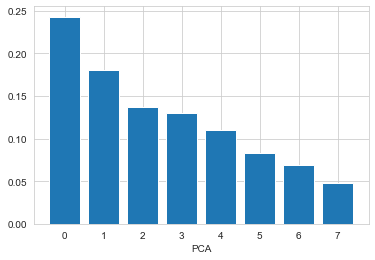

In [31]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), explained_variance)
ax.set_xlabel('PCA')

In [33]:
cumulative_explained_variance = np.cumsum(explained_variance)
cumulative_explained_variance

array([0.24297674, 0.4234199 , 0.55992299, 0.68986388, 0.80042636,
       0.88344881, 0.95268664, 1.        ])

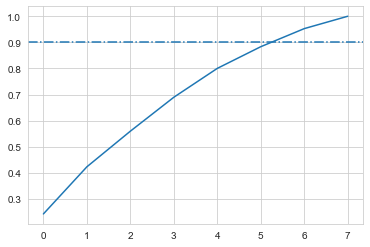

In [37]:
fig, ax = plt.subplots()
ax.plot(range(8), cumulative_explained_variance)
ax.axhline(y=0.9, linestyle='-.')

In [38]:
pca = PCA(n_components=7, random_state=7)
pca.fit(scaled_train)
X = pca.transform(scaled_train)

In [40]:
X.shape

(4802, 7)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [44]:
# 1st  Decision Tree
decision_tree = DecisionTreeClassifier(random_state=7)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

In [45]:
pred_tree = decision_tree.predict(X_test)

In [46]:
pred_tree

array(['Rock', 'Hip-Hop', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Hip-Hop', 'Hip-Hop', 'Hip-Hop', 'Hip-Hop',
       'Hip-Hop', 'Hip-Hop', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Hip-Hop', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Hip-Hop', 'Hip-Hop', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Hip-Hop', 'Rock', 'Rock', 'Rock', 'Hip-Hop', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Hip-Hop', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Hip-Hop', 'Rock', 'Hip-Hop', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Hip-Hop', 'Rock',
       'Hip-Hop', 'Rock', 'Rock', 'Hip-Hop', 'Rock', 'Rock', 'Rock',


In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [81]:
cm = confusion_matrix(y_test, pred_tree) 
acc = accuracy_score(y_test, pred_tree)
report_tree = classification_report(y_test, pred_tree)

In [82]:
print(cm)

[[109  73]
 [ 55 724]]


In [83]:
acc

0.8668054110301769

In [55]:
y.value_counts()

Rock       3892
Hip-Hop     910
Name: genre_top, dtype: int64

In [56]:
# 2nd  Logistic Regression
logistic = LogisticRegression(random_state=7)
logistic.fit(X_train, y_train)
pred_log = logistic.predict(X_test)

In [85]:
cm = confusion_matrix(y_test, pred_log) 
acc = accuracy_score(y_test, pred_log)
report_logistic = classification_report(y_test, pred_log)

In [86]:
cm

array([[104,  78],
       [ 29, 750]], dtype=int64)

In [87]:
acc

0.8886576482830385

In [62]:
# 3rd  Random Forest
random_forest = RandomForestClassifier(random_state=7)
random_forest.fit(X_train, y_train)
pred_forest = random_forest.predict(X_test)

In [89]:
cm = confusion_matrix(y_test, pred_forest) 
acc = accuracy_score(y_test, pred_forest)
report_forest = classification_report(y_test, pred_forest)

In [90]:
cm

array([[117,  65],
       [ 33, 746]], dtype=int64)

In [91]:
acc

0.8980228928199792

In [80]:
# Random Forest performed well as usual

In [93]:
print('Decision Tree: \n', report_tree)

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.66      0.60      0.63       182
        Rock       0.91      0.93      0.92       779

    accuracy                           0.87       961
   macro avg       0.79      0.76      0.77       961
weighted avg       0.86      0.87      0.86       961



In [94]:
print('Logistic Regression: \n', report_logistic)

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.78      0.57      0.66       182
        Rock       0.91      0.96      0.93       779

    accuracy                           0.89       961
   macro avg       0.84      0.77      0.80       961
weighted avg       0.88      0.89      0.88       961



In [95]:
print('Random Forest: \n', report_forest)

Random Forest: 
               precision    recall  f1-score   support

     Hip-Hop       0.78      0.64      0.70       182
        Rock       0.92      0.96      0.94       779

    accuracy                           0.90       961
   macro avg       0.85      0.80      0.82       961
weighted avg       0.89      0.90      0.89       961



In [96]:
hip_hop = musics.loc[musics['genre_top'] == 'Hip-Hop']
rock = musics.loc[musics['genre_top'] == 'Rock']

In [97]:
hip_hop

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
3892,2,Hip-Hop,0.416675,0.675894,0.634476,1.062807e-02,0.177647,0.159310,165.922,0.576661
3893,3,Hip-Hop,0.374408,0.528643,0.817461,1.851103e-03,0.105880,0.461818,126.957,0.269240
3894,5,Hip-Hop,0.043567,0.745566,0.701470,6.967990e-04,0.373143,0.124595,100.260,0.621661
3895,134,Hip-Hop,0.452217,0.513238,0.560410,1.944269e-02,0.096567,0.525519,114.290,0.894072
3896,583,Hip-Hop,0.748986,0.765886,0.513173,9.572095e-01,0.614844,0.886914,180.025,0.401672
...,...,...,...,...,...,...,...,...,...,...
4797,124718,Hip-Hop,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414
4798,124719,Hip-Hop,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720
4799,124720,Hip-Hop,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240
4800,124721,Hip-Hop,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087


In [98]:
rock

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,Rock,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,154,Rock,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,155,Rock,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,169,Rock,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,170,Rock,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548
...,...,...,...,...,...,...,...,...,...,...
3887,123823,Rock,0.303772,0.227905,0.207037,0.664426,0.129962,0.036349,99.323,0.031072
3888,123824,Rock,0.497877,0.328307,0.604455,0.909813,0.127005,0.040391,101.553,0.037689
3889,124184,Rock,0.022261,0.638672,0.955109,0.802745,0.352897,0.072761,124.996,0.143388
3890,124185,Rock,0.032193,0.670471,0.968672,0.781511,0.212983,0.052916,95.066,0.319052


In [100]:
rock.shape, hip_hop.shape

((3892, 10), (910, 10))

In [101]:
# There is a huge difference in amount between these two classes, let's correct this issue

In [102]:
rock = rock.sample(n=910)
rock.shape, hip_hop.shape

((910, 10), (910, 10))

In [104]:
balanced_data = pd.concat([rock, hip_hop])
balanced_data.shape

(1820, 10)

In [105]:
X = balanced_data.drop(['genre_top', 'track_id'], axis=1) 
y = balanced_data['genre_top']
X = pca.fit_transform(scaler.fit_transform(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=7)

In [106]:
# Check if REBALANCING really affects the performance

In [108]:
decision_tree = DecisionTreeClassifier(random_state=7)
decision_tree.fit(X_train, y_train)
pred_tree = decision_tree.predict(X_test)

In [109]:
logistic = LogisticRegression(random_state=7)
logistic.fit(X_train, y_train)
pred_log = logistic.predict(X_test)

In [110]:
random_forest = RandomForestClassifier(random_state=7)
random_forest.fit(X_train, y_train)
pred_forest = random_forest.predict(X_test)

In [113]:
print('Decision Tree: \n', classification_report(y_test, pred_tree))

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.81      0.80      0.80       182
        Rock       0.80      0.81      0.80       182

    accuracy                           0.80       364
   macro avg       0.80      0.80      0.80       364
weighted avg       0.80      0.80      0.80       364



In [115]:
confusion_matrix(y_test, pred_tree)

array([[145,  37],
       [ 35, 147]], dtype=int64)

In [116]:
accuracy_score(y_test, pred_tree)

0.8021978021978022

In [117]:
print('Logistic Regression: \n', classification_report(y_test, pred_log))

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.85      0.78      0.81       182
        Rock       0.80      0.86      0.83       182

    accuracy                           0.82       364
   macro avg       0.82      0.82      0.82       364
weighted avg       0.82      0.82      0.82       364



In [118]:
confusion_matrix(y_test, pred_log)

array([[142,  40],
       [ 26, 156]], dtype=int64)

In [119]:
accuracy_score(y_test, pred_log)

0.8186813186813187

In [120]:
print('Random Forest: \n', classification_report(y_test, pred_forest))

Random Forest: 
               precision    recall  f1-score   support

     Hip-Hop       0.85      0.82      0.84       182
        Rock       0.83      0.86      0.84       182

    accuracy                           0.84       364
   macro avg       0.84      0.84      0.84       364
weighted avg       0.84      0.84      0.84       364



In [121]:
confusion_matrix(y_test, pred_forest)

array([[150,  32],
       [ 26, 156]], dtype=int64)

In [122]:
accuracy_score(y_test, pred_forest)

0.8406593406593407

In [123]:
# Seems like instead of improving, it declined the performance

In [124]:
# Time to cross-validation

In [125]:
from sklearn.model_selection import KFold, cross_val_score

In [126]:
k_fold = KFold(n_splits=10)

In [135]:
decision_tree = DecisionTreeClassifier(random_state=7)
logistic = LogisticRegression(random_state=7)
random_forest = RandomForestClassifier(random_state=7)

In [136]:
tree_score = cross_val_score(decision_tree, X, y, cv=k_fold)
log_score = cross_val_score(logistic, X, y, cv=k_fold)
forest_score = cross_val_score(random_forest, X, y, cv=k_fold)

In [137]:
tree_score

array([0.78021978, 0.81868132, 0.72527473, 0.76373626, 0.75824176,
       0.71978022, 0.78571429, 0.78571429, 0.73076923, 0.82417582])

In [138]:
log_score

array([0.86263736, 0.86813187, 0.79120879, 0.84615385, 0.80769231,
       0.71978022, 0.77472527, 0.78021978, 0.8021978 , 0.81318681])

In [139]:
forest_score

array([0.86263736, 0.8956044 , 0.75274725, 0.82967033, 0.80769231,
       0.76373626, 0.78571429, 0.81318681, 0.84615385, 0.81318681])

In [140]:
print(f'Decision Tree\'s score: {tree_score.mean()} \nLogistic Regression\'s score: {log_score.mean()}\nDecision Tree\'s score: {forest_score.mean()}')

Decision Tree's score: 0.7692307692307692 
Logistic Regression's score: 0.8065934065934066
Decision Tree's score: 0.817032967032967
